# Реализация метода покоординатного спуска с постоянным шагом для поиска минимума функции

## 1. Описание алгоритма

* *Вход*: узел абсциссы
* *Выход*: точка минимума функции

1. Инициализация точки $x_0$
2. повтораять цикл i=1..n
    1. фиксируем значение всех переменнцых $x_i$, получая одномерную функцию $f(x_i)$
    2. проводим одномерную оптимизацию по переменной $x_i$
    3. если выполнен критерий останова, то возвращаем текущее значение $x = (x_1, x_2, ..., x_n)$

P.S. Критерий останова: $||f(x^{[k+1]}, y^{[k+1]})  - f(x^{[k]}, y^{[k]})|| \le \epsilon $ или по критическому числу вычислений

## 2. Построение тестовых функций

In [502]:
import numpy as np
import scipy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [503]:
def func1_ellipsoid(x: float, y:float, A: int=-3, B: int=3):
    """
    x, y - узлы
    A, B - полуоси элипсойда
    """
    return (x / A) ** 2 + (y / B) ** 2

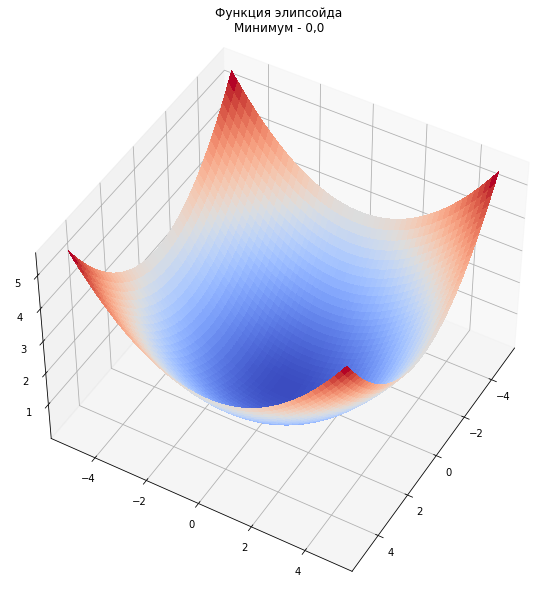

In [504]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
# угол обзора
ax.view_init(45, 30)

# точки
x = np.linspace(-5, 5, num=1000, endpoint=True)
y = np.linspace(-5, 5, num=1000, endpoint=True)
x, y = np.meshgrid(x, y)
z = np.array([
    func1_ellipsoid(x_, y_) for x_, y_ in zip(x, y)
])

# Создание графика тестовой функции 1
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("Функция элипсойда\nМинимум - 0,0")
plt.show()

In [505]:
def func2_rosenbrok(x: float, y: float):
    """
    x, y - узлы
    """
    return 100*(y - x**2)**2 + (1 - x)**2

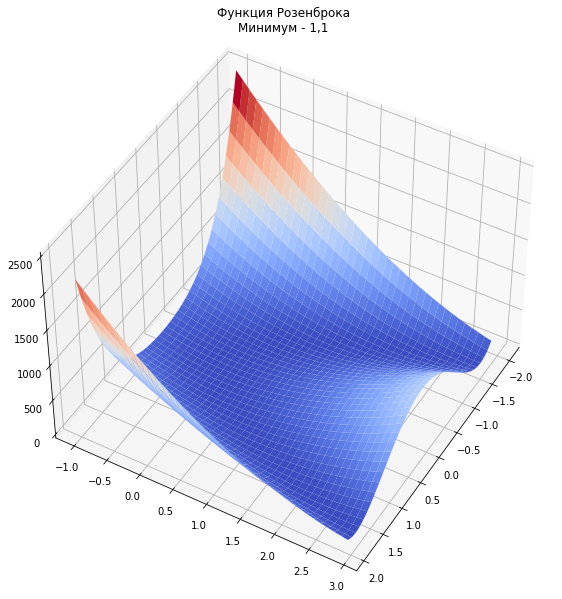

In [506]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

# угол обзора
ax.view_init(45, 30)

# точки
x = np.arange(-2, 2, 0.1)
y = np.arange(-1, 3, 0.1)
x, y = np.meshgrid(x, y)
z = np.array([
    func2_rosenbrok(x_, y_) for x_, y_ in zip(x, y)
])

# Создание графика тестовой функции 2
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
plt.title("Функция Розенброка\nМинимум - 1,1")
plt.show()

# 3. Построение функции покоординатного спуска

In [511]:
def one_param_min(f, param, fix_step, eps, iter_=1000):
    """
    f - функция от одной перменной
    param - параметр для минимизациии
    fix_step - шаг
    eps - погрешность
    iter - максимальное количество итераций
    """
    import math
    prev_res = f(param)
    curr_res = -math.inf
    param1, param2 = param + fix_step, param - fix_step
    res1, res2 = f(param1), f(param2)
    if res1 < res2:
        param = param1
        curr_res = res1
    else:
        param = param2
        curr_rest = res2
    
    global one_param_iter
    # максимум iter_ итераций
    for i in range(iter_):
        if abs(curr_res - prev_res) <= eps:
            one_param_iter += i
            return param
        param1, param2 = param + fix_step, param - fix_step
        res1, res2 = f(param1), f(param2)
        if res1 < res2:
            param = param1
            prev_res, curr_res = curr_res, res1
        else:
            param = param2
            prev_res, curr_rest = curr_res, res2
    
    one_param_iter += iter_
    return param
        
    
def coord_descent(f, x: float, y: float, fix_step: float, eps: float, iter_=1000):
    """
    f - функция 
    x, y - начальные точки
    fix_step - шаг спуска
    eps - граница погрешности
    iter - максимальное количество итераций
    
    :return: (x, y, z, iter_, dots) - точка минимума
    """
    dots = [] # для traceback
    dots.append([x, y, f(x, y)])
    
    prev_res = f(x, y)
    x = one_param_min((lambda x: f(x, y)), x, fix_step, eps, iter_)
    y = one_param_min((lambda y: f(x, y)), y, fix_step, eps, iter_)
    curr_res = f(x, y)
    dots.append([x, y, curr_res])

    # максимум iter_ итераций
    for i in range(iter_):
        if abs(curr_res - prev_res) <= eps:
            dots.append([x, y, curr_res])
            return (x, y, curr_res, i, dots)
        
        x = one_param_min((lambda x: f(x, y)), x, fix_step, eps, iter_)
        y = one_param_min((lambda y: f(x, y)), y, fix_step, eps, iter_)
        prev_res, curr_res = curr_res, f(x, y)
        dots.append([x, y, curr_res])
    dots.append([x, y, curr_res])
    return (x, y, curr_res, iter_, dots)


## Тестирование для функции элипсойда. Начальная точка (2,2), A,B = -3, 3

Точка минимума: 2.0496e-14, 2.0496e-14, погрешность: 1e-05
Количество итераций: 1


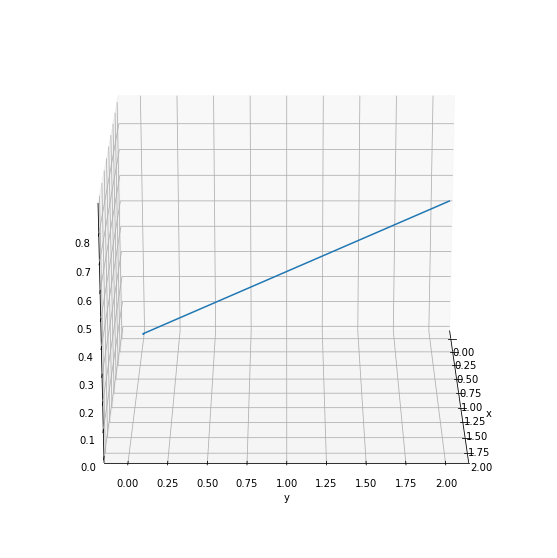

In [585]:
eps = 10**(-5) # погрешность
fix_step = 0.005 # шаг
iter_ = 1000 # максимальное количество итераций для вычисления

x, y, z, fin_iter, table = coord_descent(func1_ellipsoid, 2, 2, fix_step, eps, iter_)

print(f"Точка минимума: {x:10.5}, {y:10.5}, погрешность: {eps:2.5}")
print(f"Количество итераций: {fin_iter}") 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

# угол обзора
ax.view_init(20, 0)

# точки
x = [float(str_[0]) for str_ in table]
y = [float(str_[1]) for str_ in table]
z = [float(str_[2]) for str_ in table]

# Создание графика
surf = ax.plot3D(x, y, z)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Тестирование для функции элипсойда. Начальная точка (2,100), A, B = 2, 100

Точка минимума:     -0.005, 1.8452e-11, погрешность: 1e-05
Количество итераций: 20

===== Таблица ====
x:   2.0 	| y: 1e+02 	| z: 1.11e+03
x: 2.05e-14 	| y:  90.0 	| z: 9e+02
x: 2.05e-14 	| y:  80.0 	| z: 7.11e+02
x: 2.05e-14 	| y:  70.0 	| z: 5.44e+02
x: 2.05e-14 	| y:  60.0 	| z: 3.99e+02
x: 2.05e-14 	| y:  50.0 	| z: 2.77e+02
x: 2.05e-14 	| y:  39.9 	| z: 1.77e+02
x: 2.05e-14 	| y:  29.9 	| z:  99.5
x: 2.05e-14 	| y:  19.9 	| z:  44.1
x: 2.05e-14 	| y:  9.91 	| z:  10.9
x: 2.05e-14 	| y: -0.005 	| z: 2.78e-06
x: -0.005 	| y: 1.85e-11 	| z: 2.78e-06


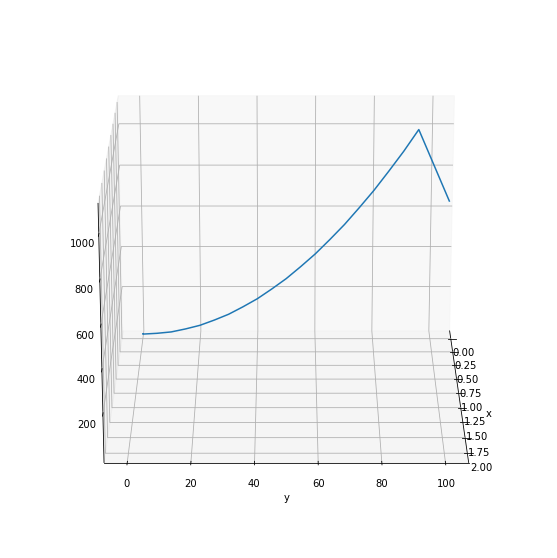

In [588]:
eps = 10**(-5) # погрешность
fix_step = 0.005 # шаг
iter_ = 1000 # максимальное количество итераций для вычисления

x, y, z, fin_iter, table = coord_descent(func1_ellipsoid, 2, 100, fix_step, eps, iter_)

print(f"Точка минимума: {x:10.5}, {y:10.5}, погрешность: {eps:2.5}")
print(f"Количество итераций: {fin_iter}") 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

# угол обзора
ax.view_init(20, 0)

# точки
x = [float(str_[0]) for str_ in table]
y = [float(str_[1]) for str_ in table]
z = [float(str_[2]) for str_ in table]

print("\n===== Таблица ====")
for x_, y_, z_ in zip(x[::2], y[::2], z[::2]):
    print(f"x: {x_:5.3} \t| y: {y_:5.3} \t| z: {z_:5.3}")
    
# Создание графика
surf = ax.plot3D(x, y, z)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Тестирование для функции Розенброка. Начальная точка (2,2)

Точка минимума:     1.0004,     1.0008, погрешность: 1e-07
Количество итераций: 1332

===== Таблица ====
x:   2.0 	| y:   2.0 	| z: 4.01e+02
x:  1.38 	| y:  1.92 	| z: 0.148
x:  1.36 	| y:  1.84 	| z: 0.126
x:  1.33 	| y:  1.76 	| z: 0.107
x:   1.3 	| y:   1.7 	| z: 0.0916
x:  1.28 	| y:  1.63 	| z: 0.0771
x:  1.25 	| y:  1.57 	| z: 0.0639
x:  1.23 	| y:  1.51 	| z: 0.053
x:  1.21 	| y:  1.46 	| z: 0.0436
x:  1.19 	| y:  1.41 	| z: 0.0356
x:  1.17 	| y:  1.37 	| z: 0.0285
x:  1.15 	| y:  1.32 	| z: 0.0226
x:  1.13 	| y:  1.28 	| z: 0.0177
x:  1.12 	| y:  1.25 	| z: 0.014
x:   1.1 	| y:  1.22 	| z: 0.0107
x:  1.09 	| y:  1.19 	| z: 0.00789
x:  1.08 	| y:  1.16 	| z: 0.00582
x:  1.07 	| y:  1.14 	| z: 0.00432
x:  1.06 	| y:  1.11 	| z: 0.0031
x:  1.05 	| y:  1.09 	| z: 0.00209
x:  1.04 	| y:  1.07 	| z: 0.00133
x:  1.03 	| y:  1.06 	| z: 0.000871
x:  1.02 	| y:  1.05 	| z: 0.000567
x:  1.02 	| y:  1.04 	| z: 0.00035
x:  1.01 	| y:  1.03 	| z: 0.000188
x:  1.01 	| y:  1.02 	| z: 7.63e-05


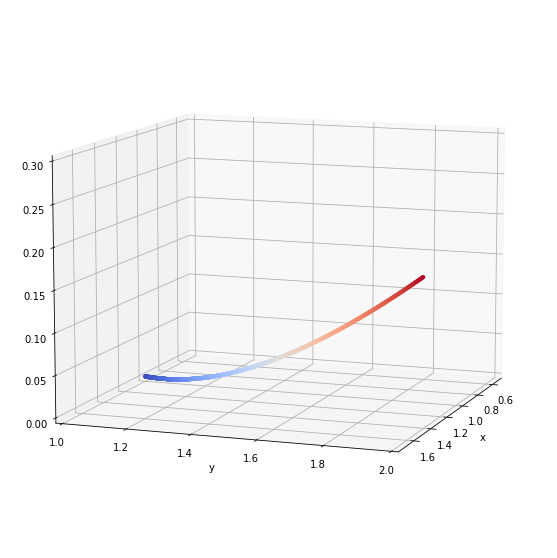

In [581]:
eps = 10**(-7) # погрешность
fix_step = 0.0001 # шаг
iter_ = 100000 # максимальное количество итераций для вычисления

x, y, z, fin_iter, table = coord_descent(func2_rosenbrok, 2, 2, fix_step, eps, iter_)

print(f"Точка минимума: {x:10.5}, {y:10.5}, погрешность: {eps:2.5}")
print(f"Количество итераций: {fin_iter}") 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

# угол обзора
ax.view_init(10, 20)

# точки
x = [float(str_[0]) for str_ in table]
y = [float(str_[1]) for str_ in table]
z = [float(str_[2]) for str_ in table]

print("\n===== Таблица ====")
for x_, y_, z_ in zip(x[::50], y[::50], z[::50]):
    print(f"x: {x_:5.3} \t| y: {y_:5.3} \t| z: {z_:5.3}")

# Создание графика
ax.set_xlim(0.5, 1.75)
ax.set_ylim(1, 2)
ax.set_zlim(0, 0.3)
surf = ax.scatter3D(x, y, z, cmap=cm.coolwarm, c=y, s=10,)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Вывод по функции Розенброка для данного способа:

С уменьшением погрешности - точность вычислений становится выше, при этом количество итераций увеличивается не так сильно, как казалось бы.

При $\epsilon = 10^{-5}$ количество итераций - 992. Стартовая точка = 2,2. Шаг 0.0001.

При $\epsilon = 10^{-7}$ количество итераций - 1332. Стартовая точка = 2,2. Шаг 0.0001.